# K Means Clustering Algorithm

#### K-means clustering is a popular unsupervised machine learning algorithm used to partition a dataset into distinct clusters

### • Unsupervised Learning
#### Definition: A type of machine learning where the algorithm is trained on an unlabeled dataset, meaning the training data consists of input data without any corresponding output labels.
#### Goal: To find hidden patterns or intrinsic structures in the input data.
#### Example: Grouping customers into different segments based on their purchasing behavior without knowing in advance which customer belongs to which segment.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
df = df.rename(columns={'Income($)': 'Income'})

In [6]:
import  matplotlib.pyplot as plt

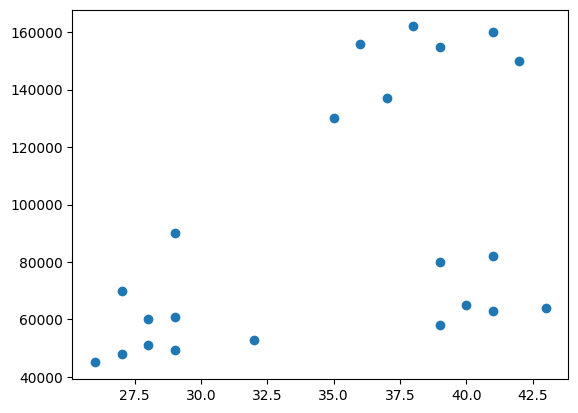

In [7]:
plt.scatter(df.Age,df.Income)

##### Here now we have make Clusters ,by looking graph we are getting know that 3 clulsters are forming

In [11]:
from sklearn.cluster import KMeans

In [13]:
km  = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [18]:
y_predict=km.fit(df[['Age','Income']])

C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
y_predict=km.predict(df[['Age','Income']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [21]:
df["Cluster"]=y_predict
df.head()

,Name,Age,Income,Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


##### Now for presenting it grpahicaly ,we need make the different datafrem for 0,1,2 because cluster are form as 0,1,2

In [28]:
df01 =  df[df.Cluster==0]
df02 =  df[df.Cluster==1]
df03 =  df[df.Cluster==2]

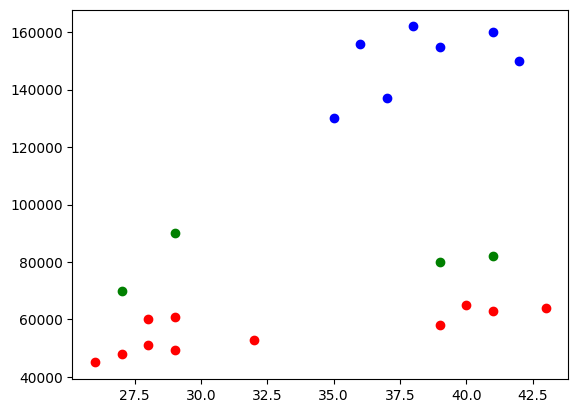

In [32]:
plt.scatter(df01.Age,df01.Income,color='r')
plt.scatter(df02.Age,df02.Income,color='b')
plt.scatter(df03.Age,df03.Income,color='g')

#### Here some defect it generating clusters ,this is because of the scale of y axis (its larger ),will use minmaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler() # we need to minmax income scale so we aply it to Income scale

In [44]:
scaler.fit(df[["Income"]]) # while fitting always use 2d array


MinMaxScaler()

In [47]:
df['Income'] = scaler.fit_transform(df[['Income']])
df.head()

,Name,Age,Income,Cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [48]:
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [53]:
Transfomr_df=df

In [54]:
km = KMeans(n_clusters=3)

In [55]:
km.fit(Transfomr_df[["Age","Income"]])

C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [56]:
y1=km.predict(Transfomr_df[["Age","Income"]])
y1

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [60]:
Transfomr_df.head()

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [67]:
Transfomr_df=Transfomr_df.drop("Cluster",axis="columns")
Transfomr_df["new_clusters"]=y1

In [68]:
Transfomr_df.head()

,Name,Age,Income,new_clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [69]:
Transfomr_df1 =  df[df.new_clusters==0]
Transfomr_df2 =  df[df.new_clusters==1]
Transfomr_df3 =  df[df.new_clusters==2]

Text(0.5, 0, 'Age')

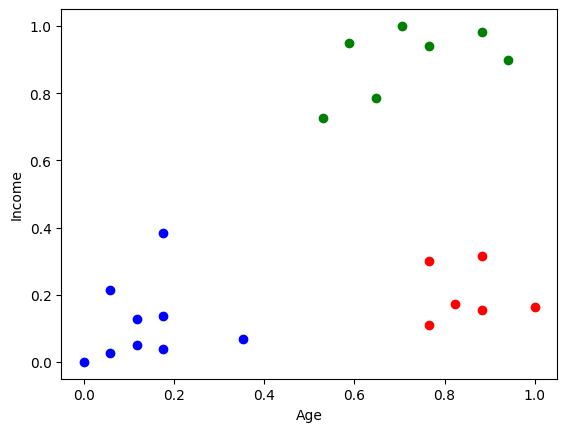

In [75]:
plt.scatter(Transfomr_df1.Age,Transfomr_df1.Income,color='r')
plt.scatter(Transfomr_df2.Age,Transfomr_df2.Income,color='b')
plt.scatter(Transfomr_df3.Age,Transfomr_df3.Income,color='g')
plt.ylabel("Income")
plt.xlabel("Age")

#### Now it properly grouped 
